# Combination BaySeg - GemPy

## 4 perfectly horizontal layers

In [1]:
import numpy as np
import pandas as pd
import itertools as it

import sys
sys.path.append("C:/Users/Tobias Giesgen/PycharmProjects/gempy")
sys.path.append("../")
import bayseg
import gempy as gp

## Data import

In [2]:
# load the data from excel sheet  
data = pd.read_csv("../data/synthetic_well_data_3_layers_tilted.csv")

# define measurement names 
feature_names = ['GR','NEUDEN','PE','IND'] #  ['feature1','feature2','feature3','feature4'] #,'feature5','feature6','feature7','feature8'] #  

# define borehole names
boreholes = ['BH1','BH2','BH3','BH4','BH5']# ,'BH6','BH7','BH8']

## Data normalization 
##### [-3, 3] --> important for varying well data

In [3]:
feature_vectors_norm = bayseg.normalize_feature_vectors(data.loc[:,feature_names])

## Investigate number of labels
##### Bayesian information criteria 

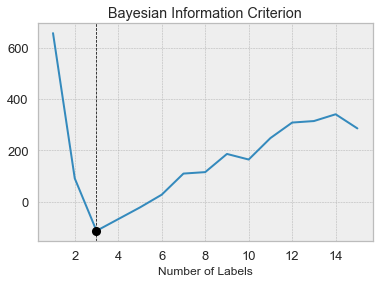

global minimum:  3


3

In [4]:
bayseg.bic(feature_vectors_norm, 15, plot = True)

In [5]:
n, nft = bayseg.test_bic(feature_vectors_norm, 15)

The optimal number of layers is:  3


## Initial iteration of BaySeg-Segmentation

In [4]:
import importlib
import matplotlib.pyplot as plt
%matplotlib notebook

clf = bayseg.BaySeg(feature_vectors_norm, 3, data , feature_names, boreholes, 
                    gp_resolution = 200, plot = '2dy', inc_gempy=True)

In [7]:
# ver_s, sim_s = gp.get_surfaces(clf.interp_data, clf.lith_block[1], original_scale=True)
# gp.plotting.plot_surfaces_3D_real_time(clf.geo_data,clf.interp_data, ver_s, sim_s)

In [8]:
# %matplotlib notebook
# gp.plotting.plot_section(clf.geo_data, clf.lith_block[0], cell_number = 5, direction = 'x', plot_data = True)

In [29]:
# extract gempy_model with coordinates
gempy_model = {'layer': np.flipud(clf.lith_block[0]).astype(int), 'X': np.flipud(clf.geo_data.grid.values[:,0]), 
               'Y': np.flipud(clf.geo_data.grid.values[:,1]),'Z': np.flipud(clf.geo_data.grid.values[:,2]),
                  'gp_res': clf.gp_resolution}
lith_block = pd.DataFrame(gempy_model)

lith_block.to_csv('../data/gempy_model_4layers_90deg.csv', index= False)

In [6]:
# gp.plotting.plot_data(clf.geo_data, direction = 'y')

## Iterate the BaySeg-Segmentation 

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Gempy model under construction:
Borehole zoning finished!
Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Gempy model finished!
Gempy model under construction:
Borehole zoning finished!
Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Gempy model finished!


 20%|████████████████▌                                                                  | 1/5 [07:58<31:53, 478.30s/it]

Gempy model under construction:
Borehole zoning finished!
Gempy model finished!


 40%|█████████████████████████████████▏                                                 | 2/5 [11:28<17:13, 344.44s/it]

Gempy model under construction:
Borehole zoning finished!
Gempy model finished!


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [15:02<10:01, 300.96s/it]

Gempy model under construction:
Borehole zoning finished!
Gempy model finished!


 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [18:30<04:37, 277.69s/it]

Gempy model under construction:
Borehole zoning finished!


<IPython.core.display.Javascript object>


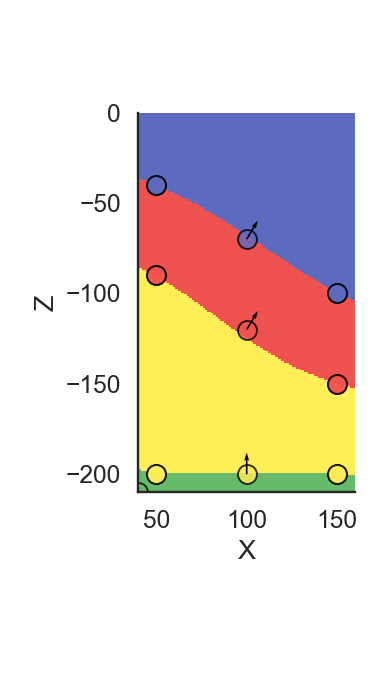

Gempy model finished!


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [22:06<00:00, 265.24s/it]


In [5]:
# %%capture
clf.fit(5, # number of iterations
        beta_jump_length=2, 
        mu_jump_length=0.0005, 
        cov_volume_jump_length=0.00005, 
        theta_jump_length=0.0000005, verbose=False, plot= "2dy")

In [7]:
# extract gempy_model with coordinates and safe as file.csv
gempy_model = {'layer': np.flipud(clf.lith_block[0]).astype(int), 'X': np.flipud(clf.geo_data.grid.values[:,0]), 
               'Y': np.flipud(clf.geo_data.grid.values[:,1]),'Z': np.flipud(clf.geo_data.grid.values[:,2])}
lith_block = pd.DataFrame(gempy_model)

lith_block.to_csv('../data/gempy_model_3layers_tilted_res200.csv', index= False)

In [8]:
label_true

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [9]:
label_true[np.where(label_true == 0)] = 12
label_true[np.where(label_true == 1)] = 10
label_true[np.where(label_true == 2)] = 13
label_true[np.where(label_true == 3)] = 11
label_true = label_true -10

In [17]:
x = len(clf.labels)

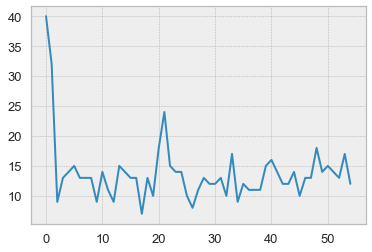

In [12]:
diff = []
for i in range(len(clf.labels)-1):
    diff.append(len(np.where(clf.labels[i] - label_true != 0)[0]))
%matplotlib inline
plt.plot(range(len(diff)),diff)

In [14]:
diff

[]

In [13]:
clf.labels_probability[0]

array([[0.00000000e+000, 5.39111150e-136, 2.02905800e-258,
        1.00000000e+000],
       [0.00000000e+000, 6.66071253e-141, 4.07151405e-301,
        1.00000000e+000],
       [0.00000000e+000, 3.52624941e-176, 4.99451701e-290,
        1.00000000e+000],
       [0.00000000e+000, 5.11703288e-150, 2.35277541e-273,
        1.00000000e+000],
       [0.00000000e+000, 5.07600605e-155, 5.41594108e-315,
        1.00000000e+000],
       [1.21751838e-140, 1.00000000e+000, 5.19434252e-222,
        1.56059591e-108],
       [5.88343401e-155, 1.00000000e+000, 7.84216190e-188,
        4.49374071e-092],
       [5.41434397e-125, 1.00000000e+000, 4.05552072e-219,
        1.19600068e-115],
       [7.56466491e-153, 1.00000000e+000, 1.72462908e-207,
        4.35038897e-110],
       [2.17511489e-159, 1.00000000e+000, 1.65595490e-185,
        1.68231158e-104],
       [0.00000000e+000, 6.32220786e-168, 1.00000000e+000,
        8.96907962e-253],
       [0.00000000e+000, 4.61798322e-189, 1.00000000e+000,
      

In [8]:
len(np.where(np.max(np.round(clf.labels_probability[0],2),axis=1) != 1)[0])

IndexError: list index out of range

In [14]:
np.round(clf.labels_probability[0],2)

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [8]:
labels_1 = data.layer.values

In [9]:
labels_1

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,

In [11]:
labels_1[np.where(labels_1 == 2)] = 12
labels_1[np.where(labels_1 == 3)] = 10
labels_1[np.where(labels_1 == 0)] = 13
labels_1[np.where(labels_1 == 1)] = 11
labels_1 = labels_1 -10

In [10]:
clf.labels[-1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,

In [12]:
diff = []
for i in range(len(clf.labels)):
    diff.append(len(np.where(clf.labels[i] - labels_1 != 0)[0]))

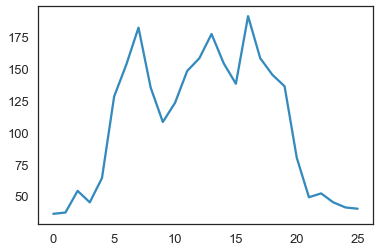

In [13]:
%matplotlib inline
plt.plot(range(len(diff)),diff)

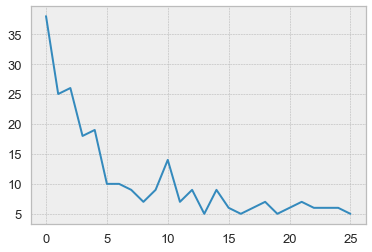

In [13]:
%matplotlib inline
plt.plot(range(len(diff)),diff)

In [7]:
clf.labels

[array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
        1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3,
        0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Check the combination algorithm

In [8]:
# gp.plotting.plot_data_3D(clf.geo_data)

In [9]:
# compare coordinates from GemPy grid and coordinates from raw well data (BaySeg)
print('Gempy coordinates        |      Well data coordinates')
print('_____________________________________________________')
for i in range(15):    
    print(clf.index_temp[clf.index_gempy[15+i*3]],'     |     ',clf.coords[15+i*3])

Gempy coordinates        |      Well data coordinates
_____________________________________________________
[  50.8   50.8 -161.7]      |      [  50   50 -160]
[  50.8   50.8 -191.1]      |      [  50   50 -190]
[ 50.8 149.2 -18.9]      |      [ 50 150 -20]
[ 50.8 149.2 -48.3]      |      [ 50 150 -50]
[ 50.8 149.2 -81.9]      |      [ 50 150 -80]
[  50.8  149.2 -111.3]      |      [  50  150 -110]
[  50.8  149.2 -140.7]      |      [  50  150 -140]
[  50.8  149.2 -170.1]      |      [  50  150 -170]
[  50.8  149.2 -199.5]      |      [  50  150 -200]
[149.2  50.8 -31.5]      |      [150  50 -30]
[149.2  50.8 -60.9]      |      [150  50 -60]
[149.2  50.8 -90.3]      |      [150  50 -90]
[ 149.2   50.8 -119.7]      |      [ 150   50 -120]
[ 149.2   50.8 -149.1]      |      [ 150   50 -150]
[ 149.2   50.8 -178.5]      |      [ 150   50 -180]


In [10]:
# compare Gibbs energies calcluated from Gempy model 2D (X,Y) and BaySeg well data 1D (Z)
print('Gibbs energy GemPy       |    Gibbs energy BaySeg      |     Likelihood')
print('______________________________________________________________________')
for i in range(100):# len(clf.gempy_energy)):
    print(np.around(clf.storage_gempy_e[-1][i],2),'   |   ',
          np.around(clf.storage_gibbs_e[-1][i],2),'   |   ',
          np.around(clf.storage_like_e[-1][i],2))

Gibbs energy GemPy       |    Gibbs energy BaySeg      |     Likelihood
______________________________________________________________________
[4. 0. 4. 4.]    |    [1. 0. 1. 1.]    |    [580.5   -5.45 908.26 300.79]
[4. 0. 4. 4.]    |    [2. 0. 2. 2.]    |    [672.9   -7.54 906.51 308.06]
[4. 0. 4. 4.]    |    [2. 0. 2. 2.]    |    [ 648.75   -8.15 1037.39  389.39]
[4. 0. 4. 4.]    |    [2. 0. 2. 2.]    |    [610.93  -6.75 979.83 329.8 ]
[4. 0. 4. 4.]    |    [2. 1. 2. 1.]    |    [706.22  -7.17 974.01 342.89]
[4. 4. 4. 0.]    |    [2. 1. 2. 1.]    |    [493.1  240.03 312.14  -6.84]
[4. 4. 4. 0.]    |    [2. 2. 2. 0.]    |    [414.26 200.23 344.61  -6.71]
[4. 4. 4. 0.]    |    [2. 2. 2. 0.]    |    [485.95 255.92 276.62  -5.74]
[4. 4. 4. 0.]    |    [2. 2. 2. 0.]    |    [457.91 241.01 338.72  -7.85]
[4. 4. 4. 0.]    |    [1. 2. 2. 1.]    |    [411.04 229.78 355.9   -6.8 ]
[0. 4. 4. 4.]    |    [1. 2. 2. 1.]    |    [  -7.29  573.78 1090.62  372.84]
[0. 4. 4. 4.]    |    [0. 2. 2. 2.]

# New approach

In [15]:
label_prob = np.round(clf.labels_probability[0],2)

In [16]:
# extract one borehole
label_prob_1 = label_prob[0:20]

In [17]:
label_prob_1

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [18]:
max_prob = np.sum(label_prob_1, axis=0)

In [19]:
max_prob

array([5., 5., 5., 5.])

In [22]:
likelihood_sum = []
for i in range(len(label_prob_1)+1):
    likelihood_sum.append(np.sum(label_prob_1[0:i], axis = 0))

In [24]:
likelihood_sum

[array([0., 0., 0., 0.]),
 array([0., 0., 0., 1.]),
 array([0., 0., 0., 2.]),
 array([0., 0., 0., 3.]),
 array([0., 0., 0., 4.]),
 array([0., 0., 0., 5.]),
 array([0., 1., 0., 5.]),
 array([0., 2., 0., 5.]),
 array([0., 3., 0., 5.]),
 array([0., 4., 0., 5.]),
 array([0., 5., 0., 5.]),
 array([0., 5., 1., 5.]),
 array([0., 5., 2., 5.]),
 array([0., 5., 3., 5.]),
 array([0., 5., 4., 5.]),
 array([0., 5., 5., 5.]),
 array([1., 5., 5., 5.]),
 array([2., 5., 5., 5.]),
 array([3., 5., 5., 5.]),
 array([4., 5., 5., 5.]),
 array([5., 5., 5., 5.])]

In [30]:
b = np.round(likelihood_sum/max_prob, 2)

In [31]:
b

array([[0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0.4],
       [0. , 0. , 0. , 0.6],
       [0. , 0. , 0. , 0.8],
       [0. , 0. , 0. , 1. ],
       [0. , 0.2, 0. , 1. ],
       [0. , 0.4, 0. , 1. ],
       [0. , 0.6, 0. , 1. ],
       [0. , 0.8, 0. , 1. ],
       [0. , 1. , 0. , 1. ],
       [0. , 1. , 0.2, 1. ],
       [0. , 1. , 0.4, 1. ],
       [0. , 1. , 0.6, 1. ],
       [0. , 1. , 0.8, 1. ],
       [0. , 1. , 1. , 1. ],
       [0.2, 1. , 1. , 1. ],
       [0.4, 1. , 1. , 1. ],
       [0.6, 1. , 1. , 1. ],
       [0.8, 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. ]])

In [36]:
n = 4

In [ ]:
max_like = n*[b]

In [93]:
boundary_temp = []
for k in range(n):
    lst = np.arange(n)
    lst = np.delete(lst,k)
    max_like = n*b[:,k] - np.sum(b[:,lst],axis=1)
    boundary_temp.append(np.where(max_like == max(max_like))[0][0])

In [95]:
boundary_temp.sort()

In [96]:
boundary_temp

[5, 10, 15, 20]

In [84]:
clf.boundary_temp

(5, 10, 15)

In [90]:
label_true[0:47]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [16]:
for i in range(len(b)):    
    print(b[i],label_true[i])

NameError: name 'label_true' is not defined

In [53]:
l = np.arange(n)

AttributeError: 'numpy.ndarray' object has no attribute 'delete'

In [54]:
l1 = np.delete(l,'1')

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  """Entry point for launching an IPython kernel.


In [55]:
l1

array([0, 2, 3])

In [50]:
b[:,l]

array([[0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0.4],
       [0. , 0. , 0. , 0.6],
       [0. , 0. , 0. , 0.8],
       [0. , 0. , 0. , 1. ],
       [0. , 0.2, 0. , 1. ],
       [0. , 0.4, 0. , 1. ],
       [0. , 0.6, 0. , 1. ],
       [0. , 0.8, 0. , 1. ],
       [0. , 1. , 0. , 1. ],
       [0. , 1. , 0.2, 1. ],
       [0. , 1. , 0.4, 1. ],
       [0. , 1. , 0.6, 1. ],
       [0. , 1. , 0.8, 1. ],
       [0. , 1. , 1. , 1. ],
       [0.2, 1. , 1. , 1. ],
       [0.4, 1. , 1. , 1. ],
       [0.6, 1. , 1. , 1. ],
       [0.8, 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. ]])

In [63]:
b[:,[0,2,3]]

array([[0. , 0. , 0. ],
       [0. , 0. , 0.2],
       [0. , 0. , 0.4],
       [0. , 0. , 0.6],
       [0. , 0. , 0.8],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 1. ],
       [0. , 0.4, 1. ],
       [0. , 0.6, 1. ],
       [0. , 0.8, 1. ],
       [0. , 1. , 1. ],
       [0.2, 1. , 1. ],
       [0.4, 1. , 1. ],
       [0.6, 1. , 1. ],
       [0.8, 1. , 1. ],
       [1. , 1. , 1. ]])

In [79]:
clf.boundary_temp

(5, 10, 15)

In [62]:
np.sum(b[:,[0,2,3]],axis=1)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 1.2, 1.4,
       1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ])

In [64]:
d = (3*b[:,1])-np.sum(b[:,[0,2,3]],axis=1)

In [65]:
d

array([ 0. , -0.2, -0.4, -0.6, -0.8, -1. , -0.4,  0.2,  0.8,  1.4,  2. ,
        1.8,  1.6,  1.4,  1.2,  1. ,  0.8,  0.6,  0.4,  0.2,  0. ])

In [78]:
np.where(d == max(d))[0][0]

10

In [72]:
b[np.where(d == max(d))[0]]

array([[0., 1., 0., 1.]])

In [70]:
b[:,0]

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.03, 0.03, 0.03, 0.12, 0.21, 0.3 , 0.37, 0.46, 0.55, 0.64,
       0.73, 0.82, 0.91, 1.  ])